In [1]:
%matplotlib inline
%pip install xlrd
%pip install --upgrade pandas
from ipywidgets import interactive, fixed

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import timeit

     |████████████████████████████████| 96 kB 2.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.
     |████████████████████████████████| 9.9 MB 4.2 MB/s eta 0:00:01
  Attempting uninstall: pandas
    Found existing installation: pandas 0.24.2
    Uninstalling pandas-0.24.2:
      Successfully uninstalled pandas-0.24.2
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pkg_resources
import types
def get_imports():
    for name, val in globals().items():
        if isinstance(val, types.ModuleType):
            # Split ensures you get root package, 
            # not just imported function
            name = val.__name__.split(".")[0]

        elif isinstance(val, type):
            name = val.__module__.split(".")[0]

        # Some packages are weird and have different
        # imported names vs. system/pip names. Unfortunately,
        # there is no systematic way to get pip names from
        # a package's imported name. You'll have to add
        # exceptions to this list manually!
        poorly_named_packages = {
            "PIL": "Pillow",
            "sklearn": "scikit-learn"
        }
        if name in poorly_named_packages.keys():
            name = poorly_named_packages[name]

        yield name
imports = list(set(get_imports()))

# The only way I found to get the version of the root package
# from only the name of the package is to cross-check the names 
# of installed packages vs. imported packages
requirements = []
for m in pkg_resources.working_set:
    if m.project_name in imports and m.project_name!="pip":
        requirements.append((m.project_name, m.version))

for r in requirements:
    print("{}=={}".format(*r))


seaborn==0.9.0
pandas==1.2.2
numpy==1.19.5
matplotlib==3.1.3
ipywidgets==7.5.1


In [3]:
df = pd.read_csv("1997_Vernik_Liu_AppendixA.csv")

In [4]:
df.head()

,form,depth_ft,depth_m,por,b_den,ker,vp0,vp90,vs0,vs90,eps,gam,del
0,Bakken,7570,2307,1.97,2.09,0.423,3.13,3.94,1.88,2.30,0.29,0.25,NaN
1,Bakken,8630,2630,0.70,1.99,0.500,NaN,3.93,NaN,2.31,NaN,NaN,NaN
2,Bakken,8634,2632,0.65,2.06,0.409,3.02,4.14,1.76,2.50,0.44,0.51,0.03
3,Bakken,9831,2996,0.70,2.21,0.272,3.41,4.16,2.07,2.51,0.24,0.24,0.12
4,Bakken,10164,3098,0.68,2.22,0.323,3.38,4.19,2.12,2.57,0.27,0.23,0.04


In [6]:
df = df[df['eps'].notna()]

In [7]:
df.head()

,form,depth_ft,depth_m,por,b_den,ker,vp0,vp90,vs0,vs90,eps,gam,del
0,Bakken,7570,2307,1.97,2.09,0.423,3.13,3.94,1.88,2.30,0.29,0.25,NaN
2,Bakken,8634,2632,0.65,2.06,0.409,3.02,4.14,1.76,2.50,0.44,0.51,0.03
3,Bakken,9831,2996,0.70,2.21,0.272,3.41,4.16,2.07,2.51,0.24,0.24,0.12
4,Bakken,10164,3098,0.68,2.22,0.323,3.38,4.19,2.12,2.57,0.27,0.23,0.04
5,Bakken,10487,3196,0.70,2.18,0.404,3.18,4.20,1.93,2.51,0.37,0.35,NaN


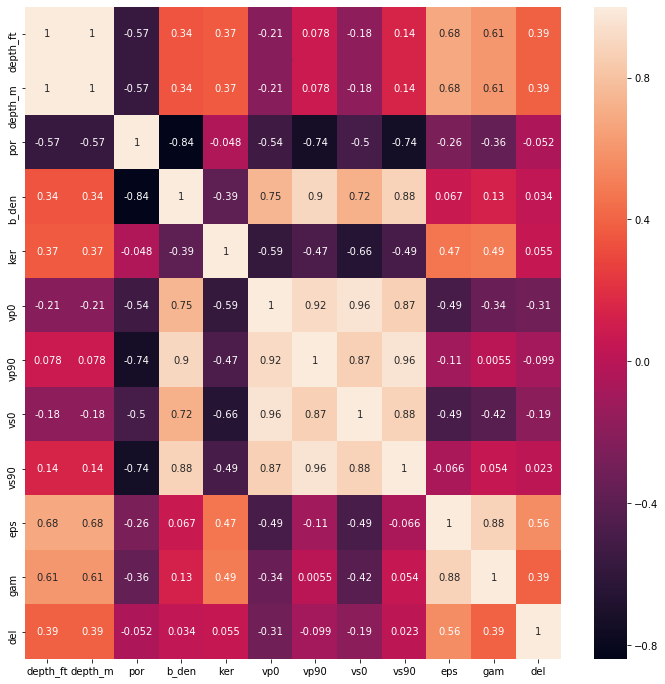

In [12]:
plt.figure(figsize=(12,12))
sns.heatmap(df.corr(),annot=True)

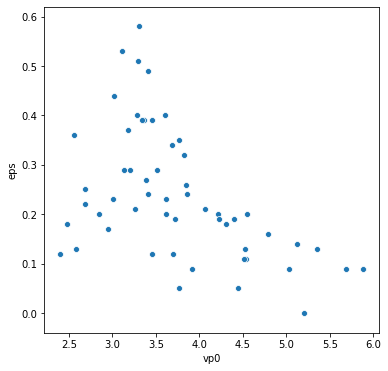

In [24]:
plt.figure(figsize=(6,6))
sns.scatterplot(x="vp0",y="eps",data=df)

In [21]:
from scipy.optimize import curve_fit

def power_law(x, a, b ):
    return a * np.power(x, -b) 

In [22]:
popt , pcov = curve_fit( power_law , df.vp0 , df.eps )
print(popt)

[0.76274678 0.90500818]


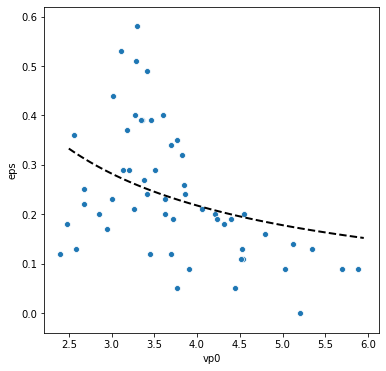

In [35]:
plt.figure(figsize=(6,6))
sns.scatterplot(x="vp0",y="eps",data=df)
x_fit = [2.5+x*0.05 for x in range(0,70)]
plt.plot(x_fit,power_law(x_fit,popt[0],popt[1]), '--',
        color = 'k',
        linewidth = 2)

[2.5, 2.55, 2.6, 2.65, 2.7, 2.75, 2.8, 2.85, 2.9, 2.95, 3.0, 3.05, 3.1, 3.15, 3.2, 3.25, 3.3, 3.35, 3.4, 3.45, 3.5, 3.55, 3.6, 3.6500000000000004, 3.7, 3.75, 3.8, 3.85, 3.9000000000000004, 3.95, 4.0, 4.05, 4.1, 4.15, 4.2, 4.25, 4.3, 4.35, 4.4, 4.45, 4.5, 4.550000000000001, 4.6, 4.65, 4.7, 4.75, 4.800000000000001, 4.85, 4.9, 4.95, 5.0, 5.050000000000001, 5.1, 5.15, 5.2, 5.25, 5.300000000000001, 5.35, 5.4, 5.45, 5.5, 5.550000000000001, 5.6, 5.65, 5.7, 5.75, 5.800000000000001, 5.85, 5.9, 5.95]
